<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2023-24
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 11th JANUARY @ 14:00**. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features = pd.read_csv('./part2/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [2]:
labels = pd.read_csv('./part2/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels.value_counts()

label     
bladabindi    2000
dealply       2000
emotet        2000
filetour      2000
flystudio     2000
gamarue       2000
gandcrab      2000
high          2000
razy          2000
startsurf     2000
upatre        2000
vittalia      2000
wannacry      2000
zbot          2000
Name: count, dtype: int64

In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [3]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [122]:
# ANSWER
wannacry_centroid = []
razy_centroid = []
startsurf_centroid = []

######### ADD YOUR CODE HERE ##########

# group data by 'labels' column
groups = train_data.groupby('labels')

# get centroids for each group
centroids = groups.mean()

#add values of each centroid in an array
wannacry_centroid = np.array(centroids[centroids.index == 'wannacry'])
razy_centroid = np.array(centroids[centroids.index == 'razy'])
startsurf_centroid = np.array(centroids[centroids.index == 'startsurf'])

#print the results 
print ("Wannacry: ", wannacry_centroid)
print ("Razy: ", razy_centroid)
print ("Startsurf: ", startsurf_centroid)

Wannacry:  [[2181660.66   11087.1 ]]
Razy:  [[100505.22   6158.28]]
Startsurf:  [[478778.12   3754.04]]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

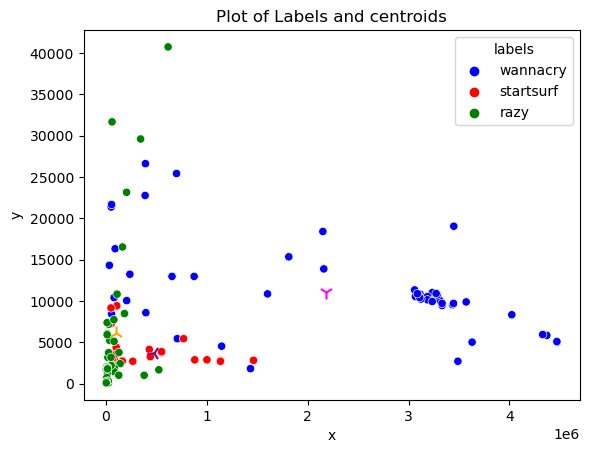

In [123]:
# ANSWER
######### ADD YOUR CODE HERE ##########
import seaborn as sns
x = np.array(train_data['x'])
y = np.array(train_data['y'])


#scatter plot for the data points with color-coded groups
sns.scatterplot(x='x', y='y', data=train_data, hue='labels', palette={"wannacry": "blue", "razy": "green","startsurf":"red"})

plt.scatter(wannacry_centroid[0,0], wannacry_centroid[0,1], marker='1',s=100, color='magenta')
plt.scatter(razy_centroid[0,0], razy_centroid[0,1], marker='2',s=100, color='orange')
plt.scatter(startsurf_centroid[0,0], startsurf_centroid[0,1], marker='3',s=100, color='purple')


plt.title("Plot of Labels and centroids")
plt.show()

### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points 

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications 

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

Score: 11


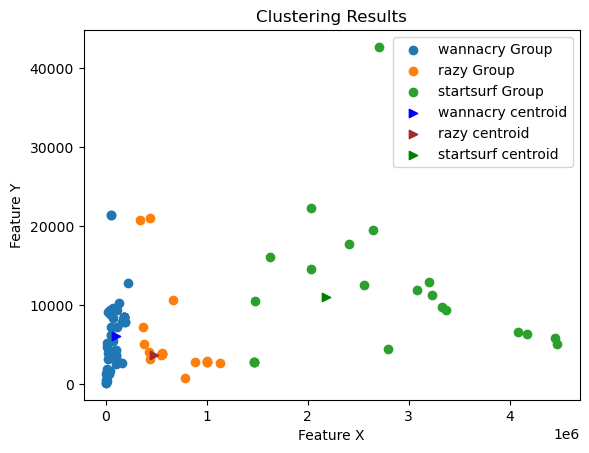

In [124]:
# ANSWER

score = 0
clustered_groups = [[] for _ in range(centroids.shape[0])]

for i in range(test_data.shape[0]):
    
    ######### Question 3a - ADD YOUR CODE HERE ##########
    distance1 = np.sqrt((test_data.iloc[i, 0] - centroids.iloc[0, 0]) ** 2 + (test_data.iloc[i, 1] - centroids.iloc[0, 1]) ** 2)
    distance2 = np.sqrt((test_data.iloc[i, 0] - centroids.iloc[1, 0]) ** 2 + (test_data.iloc[i, 1] - centroids.iloc[1, 1]) ** 2)
    distance3 = np.sqrt((test_data.iloc[i, 0] - centroids.iloc[2, 0]) ** 2 + (test_data.iloc[i, 1] - centroids.iloc[2, 1]) ** 2)
    
    distances = [distance1, distance2, distance3]
    dist_labels = ['wannacry','razy', 'startsurf']
    
      # find the index of the minimum distance
    min_index = np.argmin(distances)

    # check if the predicted label matches the actual label
    if dist_labels[min_index] == test_data.iloc[i, 2]:
        score += 1

    
    ######### Question 3b - ADD YOUR CODE HERE ##########
    
    # get Euclidean distances for each centroid
    distances_b = [np.sqrt((test_data.iloc[i, 0] - centroids.iloc[j, 0]) ** 2 + (test_data.iloc[i, 1] - centroids.iloc[j, 1]) ** 2) for j in range(centroids.shape[0])]

    #find the index of the minimum distance
    min_index_b = np.argmin(distances_b)

    # append data point to the corresponding clustered group (assign membership)
    clustered_groups[min_index_b].append(test_data.iloc[i, :])


print ("Score:", score)

# plot the results
for idx, group_data in enumerate(clustered_groups):
    group_data = pd.DataFrame(group_data)
    group_name = dist_labels[idx]
    plt.scatter(group_data.iloc[:, 0], group_data.iloc[:, 1], label=f'{group_name} Group')

#add color legend

centroid_colors = ['blue', 'brown', 'green']
for idx in range(centroids.shape[0]):
    centroid_name = dist_labels[idx]
    plt.scatter(centroids.iloc[idx, 0], centroids.iloc[idx, 1], color=centroid_colors[idx], marker='>', label=f'{centroid_name} centroid')
    
    
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('Clustering Results')

plt.show()

### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier 

#### (1 marks)

In [126]:
#ANSWER

######### ADD YOUR CODE HERE ##########

#get the accuracy score
accuracy = (score / test_data.shape[0]) * 100

print(f"final accuracy: {accuracy:.2f}%")


final accuracy: 12.22%


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function 

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [127]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import StandardScaler

#create a StandardScaler instance
scaler = StandardScaler()

# fit the scaler to the data and transform the features DataFrame
scaled_features = scaler.fit_transform(features)

# create a new dataframe with the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

#print the scaled features dataframe
scaled_features_df


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.097820,0.672159,0.826630,0.380661,0.647650,0.204495,0.792002,0.691117,1.028243,0.432558,...,0.191715,0.044177,0.845365,-0.010620,0.038420,0.068183,1.190714,0.135741,0.178144,0.406173
1,-0.355085,-0.291567,-0.274569,-0.254820,-0.323318,-0.234858,-0.178266,-0.244002,-0.310024,-0.182924,...,-0.155188,-0.155994,-0.248598,-0.175093,-0.166129,-0.179846,-0.248456,-0.168900,-0.218099,-0.238666
2,-0.351784,0.379844,0.241558,0.279985,0.178160,0.423038,0.259812,0.314504,0.202153,1.361289,...,0.543863,0.536584,0.422895,0.475873,0.359192,0.384618,0.260011,0.210779,0.192024,-0.230729
3,-0.373671,-0.408634,-0.418818,-0.451310,-0.434547,-0.405185,-0.364900,-0.422724,-0.506936,-0.419373,...,-0.411219,-0.363332,-0.464176,-0.352293,-0.315456,-0.353466,-0.429556,-0.312311,-0.303149,-0.268583
4,-0.375965,-0.363170,-0.384699,-0.382059,-0.402040,-0.327008,-0.317989,-0.328030,-0.433797,-0.295563,...,-0.278888,-0.254445,-0.370648,-0.250806,-0.230890,-0.258994,-0.365838,-0.264363,-0.302941,-0.268201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-0.352491,-0.336398,-0.325344,-0.181181,-0.350134,-0.310013,-0.325062,-0.313473,-0.423691,-0.299442,...,-0.268735,-0.255535,-0.338796,-0.231958,-0.176103,-0.132452,-0.330864,-0.255961,-0.264016,-0.243465
27996,-0.370966,-0.366824,-0.385103,-0.385023,-0.349013,-0.335946,-0.331268,-0.307131,-0.425046,-0.306423,...,-0.267889,-0.264414,-0.364133,-0.232280,-0.223518,-0.277794,-0.373201,-0.265666,-0.299393,-0.258211
27997,-0.350581,-0.379613,-0.382378,-0.165528,-0.353755,-0.320840,0.157763,-0.320967,-0.417336,-0.284857,...,-0.341500,-0.319559,-0.366449,-0.285923,-0.283654,-0.309548,-0.408175,-0.310138,-0.345414,-0.260450
27998,-0.345952,0.014028,-0.184426,0.140058,-0.240888,0.139788,-0.144634,0.122522,-0.272205,0.131877,...,-0.400050,-0.383582,-0.428705,-0.362280,-0.344223,-0.387274,-0.459574,-0.371125,-0.382252,-0.246461


### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data 

#### (1 mark)

In [128]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import LabelEncoder

# get a LabelEncoder
l_encoder = LabelEncoder()

#transform the labels

num_labels = l_encoder.fit_transform(labels['label'])

num_labels

array([ 7,  7,  7, ..., 13, 13, 13])

### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [129]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.model_selection import train_test_split

# split the dataset into training and testing 
x_train, x_test, y_train, y_test = train_test_split(scaled_features_df, num_labels, test_size=0.3, random_state=1)

### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [130]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# create an MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)

# fit the classifier to the training data
mlp_classifier.fit(x_train, y_train)

#predict on the test data
y_pred = mlp_classifier.predict(x_test)

#get accuracy score
accuracy = accuracy_score(y_test, y_pred)*100

# Print the accuracy score
print(f"MLP Accuracy: {accuracy:.2f}%")

MLP Accuracy: 83.40%


### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [132]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the classifier to the training data
rf_classifier.fit(x_train, y_train)

#predict on the test data
y_pred = rf_classifier.predict(x_test)

# get accuracy score
accuracy = accuracy_score(y_test, y_pred)*100

#print the accuracy score
print(f"RF Accuracy: {accuracy:.2f}%")

RF Accuracy: 87.33%


### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).

Notable insights are revealed when comparing the MLP classifier and the by-hand classifier. The MLP classifier demonstrated a noteworthy enhancement in accuracy (83.40%) when juxtaposed with the by-hand classifier (12.22%). This improvement highlights the MLP model's ability to manage higher data volumes effectively, which is important as datasets become more complex. Effective data separation was a challenge for the by-hand classifier, especially considering the complex and non-linear nature of malware characteristics. On the other hand, because it is a neural network, the MLP classifier was better at handling separability problems because it was better at identifying intricate patterns and dependencies in the data. Because the MLP model learns underlying patterns rather than adhering to preset rules, its higher accuracy also suggests that it has a superior capacity for generalising to previously unseen data. This contrasts with the by-hand method, which might find it difficult to apply to fresh malware cases, particularly given how malware types and their levels of complexity change over time. All things considered, these results demonstrate the benefits of using machine learning models—MLP in particular—in the field of security data analytics. In the context of large-scale datasets, these models not only exhibit improved generalisation capabilities and better scalability and adaptability to complex patterns, but they also improve malware classification accuracy and efficiency.